In [0]:
import tensorflow as tf

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0].shape

(32, 32, 3)

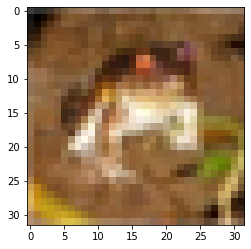

In [8]:
plt.imshow(X_train[0])

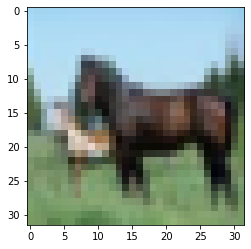

In [9]:
plt.imshow(X_train[12])

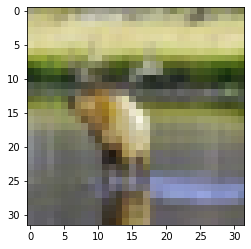

In [10]:
plt.imshow(X_train[89])

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [20]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test,y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4706 - accuracy: 0.4672 - val_loss: 1.2652 - val_accuracy: 0.5510
Epoch 2/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1464 - accuracy: 0.5935 - val_loss: 1.0792 - val_accuracy: 0.6151
Epoch 3/15
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9985 - accuracy: 0.6490 - val_loss: 1.0166 - val_accuracy: 0.6480
Epoch 4/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8894 - accuracy: 0.6929 - val_loss: 0.9746 - val_accuracy: 0.6627
Epoch 5/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7987 - accuracy: 0.7232 - val_loss: 0.9267 - val_accuracy: 0.6832
Epoch 6/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7149 - accuracy: 0.7517 - val_loss: 0.9480 - val_accuracy: 0.6825
Epoch 7/15
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6486 - accuracy: 0.7762 - val_loss: 0.9363 -

In [0]:
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.470640,0.46718,1.265206,0.5510
1,1.146418,0.59350,1.079203,0.6151
2,0.998494,0.64898,1.016606,0.6480
3,0.889358,0.69286,0.974599,0.6627
4,0.798696,0.72318,0.926662,0.6832
5,0.714895,0.75170,0.948030,0.6825
6,0.648638,0.77616,0.936304,0.6905


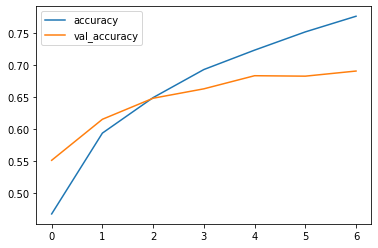

In [28]:
metrics[['accuracy', 'val_accuracy']].plot()

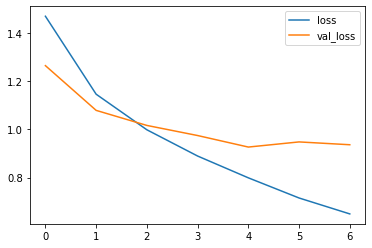

In [27]:
metrics[['loss', 'val_loss']].plot()

In [29]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.9363037943840027, 0.690500020980835]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.80      0.81      0.80      1000
           2       0.59      0.61      0.60      1000
           3       0.53      0.51      0.52      1000
           4       0.63      0.66      0.64      1000
           5       0.56      0.65      0.60      1000
           6       0.73      0.78      0.76      1000
           7       0.79      0.69      0.74      1000
           8       0.75      0.81      0.78      1000
           9       0.83      0.71      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [35]:
confusion_matrix(y_test, predictions)

array([[679,  23,  63,  19,  26,  11,  12,  25, 121,  21],
       [ 15, 805,  12,  13,   6,  14,  17,   5,  39,  74],
       [ 55,  10, 612,  50,  83,  87,  63,  24,  13,   3],
       [ 15,  11,  79, 513,  77, 188,  65,  25,  18,   9],
       [ 16,   4,  80,  72, 660,  51,  67,  36,  13,   1],
       [ 12,   1,  66, 152,  55, 645,  23,  37,   4,   5],
       [  4,   4,  50,  72,  36,  35, 783,   3,   7,   6],
       [  8,   1,  48,  49,  82,  89,  16, 694,   7,   6],
       [ 56,  42,  19,  15,  17,  14,   2,   7, 808,  20],
       [ 26, 104,  16,  21,  12,  19,  18,  25,  53, 706]])

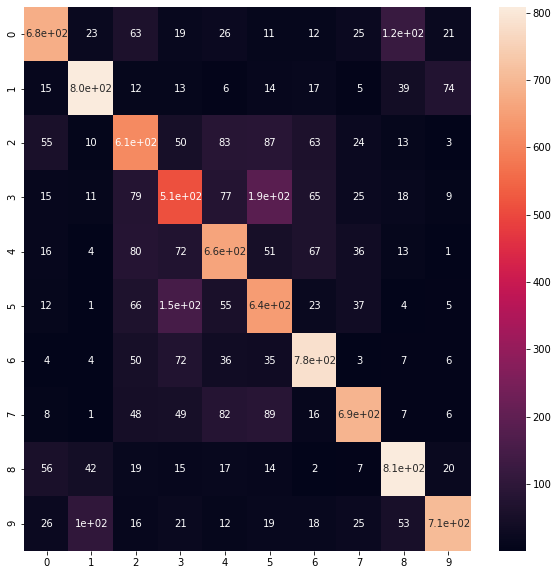

In [37]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [0]:
test_image = X_test[16]

In [44]:
test_image

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

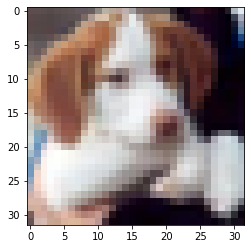

In [45]:
plt.imshow(test_image)

In [46]:
y_test[16]

array([5], dtype=uint8)

In [47]:
model.predict_classes(test_image.reshape(1,32,32,3))

array([5])